In [1]:
import pandas as pd

# Define the values of X and alpha
x_values = [-3, -2, -1, 0, 1, 2, 3]
alpha = 28

# Calculate the probability mass function p_X(x) = x^2 / alpha
p_x = [(x**2) / alpha for x in x_values]

# Create a DataFrame to display the table and compute E[X], E[X^2], and Var(X)
data = {
    'x': x_values,
    'p_X(x)': p_x,
    'x * p_X(x)': [x * p for x, p in zip(x_values, p_x)],  # For E[X]
    'x^2 * p_X(x)': [(x**2) * p for x, p in zip(x_values, p_x)]  # For E[X^2]
}

df = pd.DataFrame(data)

# Calculate E[X] and E[X^2]
expected_value_X = df['x * p_X(x)'].sum()
expected_value_X_squared = df['x^2 * p_X(x)'].sum()

# Calculate variance
variance_X = expected_value_X_squared - (expected_value_X ** 2)

# Display the table and results
print("Table of Calculations:")
df

Table of Calculations:


,x,p_X(x),x * p_X(x),x^2 * p_X(x)
0,-3,0.321429,-0.964286,2.892857
1,-2,0.142857,-0.285714,0.571429
2,-1,0.035714,-0.035714,0.035714
3,0,0.000000,0.000000,0.000000
4,1,0.035714,0.035714,0.035714
5,2,0.142857,0.285714,0.571429
6,3,0.321429,0.964286,2.892857


In [2]:
from sympy import symbols, integrate

# Define the variable and the PDF
x = symbols('x')
f_x = x / 4  # Given PDF: f_X(x) = x / 4

# Part (a) - Compute E[X]
E_X = integrate(x * f_x, (x, 1, 3))

# Part (b) - Compute P(X >= 2)
P_X_ge_2 = integrate(f_x, (x, 2, 3))

# Display the results
print("E[X] =", E_X.evalf())
print("P(X >= 2) =", P_X_ge_2.evalf())

E[X] = 2.16666666666667
P(X >= 2) = 0.625000000000000


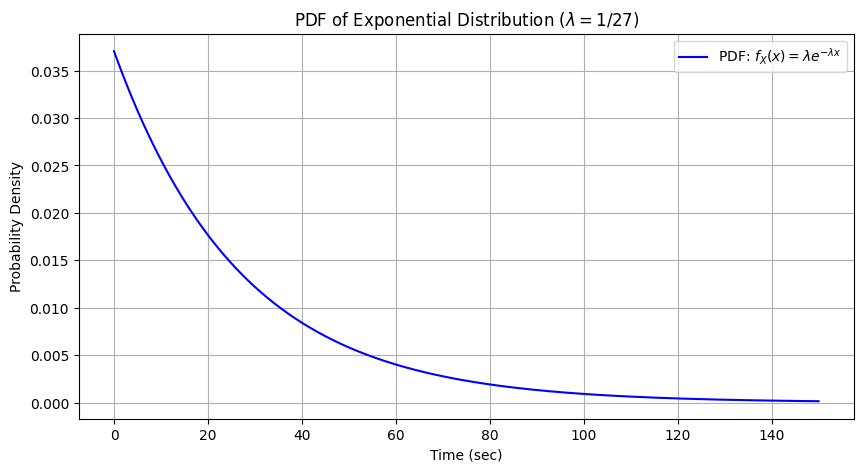

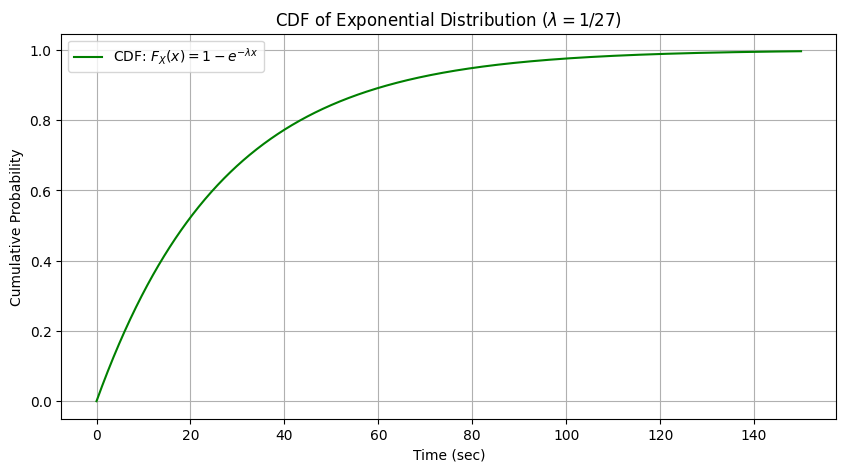

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Given lambda from part (c)
lambda_est = 1 / 27

# Define the range for x
x = np.linspace(0, 150, 1000)

# Define the PDF and CDF
pdf = lambda_est * np.exp(-lambda_est * x)
cdf = 1 - np.exp(-lambda_est * x)

# Plot the PDF
plt.figure(figsize=(10, 5))
plt.plot(x, pdf, label='PDF: $f_X(x) = \\lambda e^{-\\lambda x}$', color='blue')
plt.title('PDF of Exponential Distribution ($\lambda = 1/27$)')
plt.xlabel('Time (sec)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# Plot the CDF
plt.figure(figsize=(10, 5))
plt.plot(x, cdf, label='CDF: $F_X(x) = 1 - e^{-\\lambda x}$', color='green')
plt.title('CDF of Exponential Distribution ($\lambda = 1/27$)')
plt.xlabel('Time (sec)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()

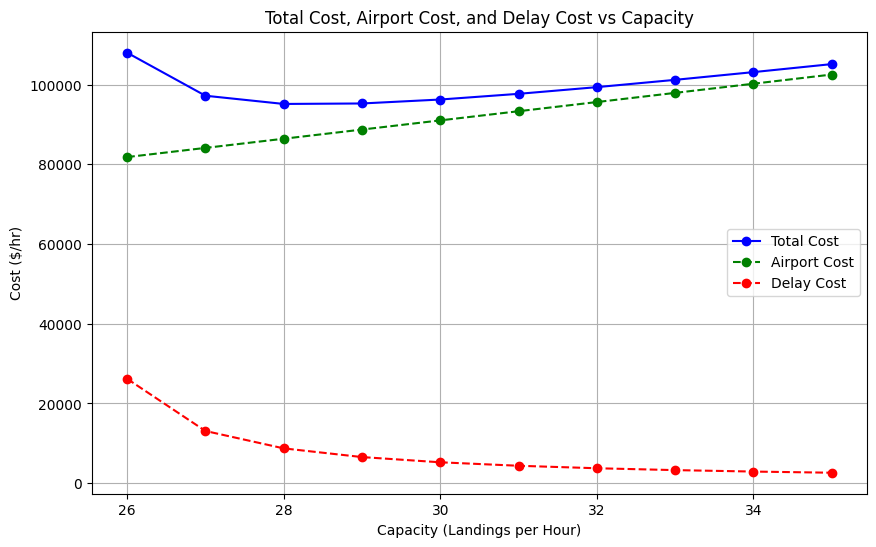

   Capacity  Total Cost ($/hr)  Airport Cost ($/hr)  Delay Cost ($/hr)
0        26      107975.000000                81800       26175.000000
1        27       97187.500000                84100       13087.500000
2        28       95125.000000                86400        8725.000000
3        29       95243.750000                88700        6543.750000
4        30       96235.000000                91000        5235.000000
5        31       97662.500000                93300        4362.500000
6        32       99339.285714                95600        3739.285714
7        33      101171.875000                97900        3271.875000
8        34      103108.333333               100200        2908.333333
9        35      105117.500000               102500        2617.500000


In [4]:
# Given values
arrival_rate = 25  # lambda (landings per hour)
delay_cost = 1047  # Total delay cost per hour of delay ($/hr)
base_airport_cost = 22000  # Base airport cost ($/hr)
per_unit_capacity_cost = 2300  # Additional cost per unit capacity increase ($/hr)

# Function to compute the total cost for a given capacity
def compute_total_cost(capacity):
    service_rate = capacity  # mu (capacity in landings per hour)
    if service_rate <= arrival_rate:
        return float('inf')  # Prevent division by zero or negative delays

    # Calculate the waiting time using Wq = 1 / (mu - lambda)
    Wq = 1 / (service_rate - arrival_rate)

    # Total delay cost
    total_delay_cost = arrival_rate * Wq * delay_cost

    # Airport operating cost
    airport_cost = base_airport_cost + per_unit_capacity_cost * service_rate

    # Total cost
    total_cost = airport_cost + total_delay_cost
    return total_cost

# Compute costs for capacities between 26 and 35
capacities = np.arange(26, 36)
total_costs = [compute_total_cost(capacity) for capacity in capacities]

# Calculate individual components: airport cost and delay cost
airport_costs = [base_airport_cost + per_unit_capacity_cost * capacity for capacity in capacities]
delay_costs = [compute_total_cost(capacity) - airport_costs[i] for i, capacity in enumerate(capacities)]

# Create a DataFrame for easy display
results = pd.DataFrame({
    'Capacity': capacities,
    'Total Cost ($/hr)': total_costs,
    'Airport Cost ($/hr)': airport_costs,
    'Delay Cost ($/hr)': delay_costs
})

# Plotting the results
plt.figure(figsize=(10, 6))

# Total cost
plt.plot(results['Capacity'], results['Total Cost ($/hr)'], marker='o', linestyle='-', color='b', label='Total Cost')

# Airport cost
plt.plot(capacities, airport_costs, marker='o', linestyle='--', color='g', label='Airport Cost')

# Delay cost
plt.plot(capacities, delay_costs, marker='o', linestyle='--', color='r', label='Delay Cost')

# Annotate the minimum total cost
min_cost_index = results['Total Cost ($/hr)'].idxmin()
min_capacity = results.loc[min_cost_index, 'Capacity']
min_total_cost = results.loc[min_cost_index, 'Total Cost ($/hr)']

# Titles and labels
plt.title('Total Cost, Airport Cost, and Delay Cost vs Capacity')
plt.xlabel('Capacity (Landings per Hour)')
plt.ylabel('Cost ($/hr)')
plt.grid(True)
plt.legend()
plt.show()

# Display the results
print(results)

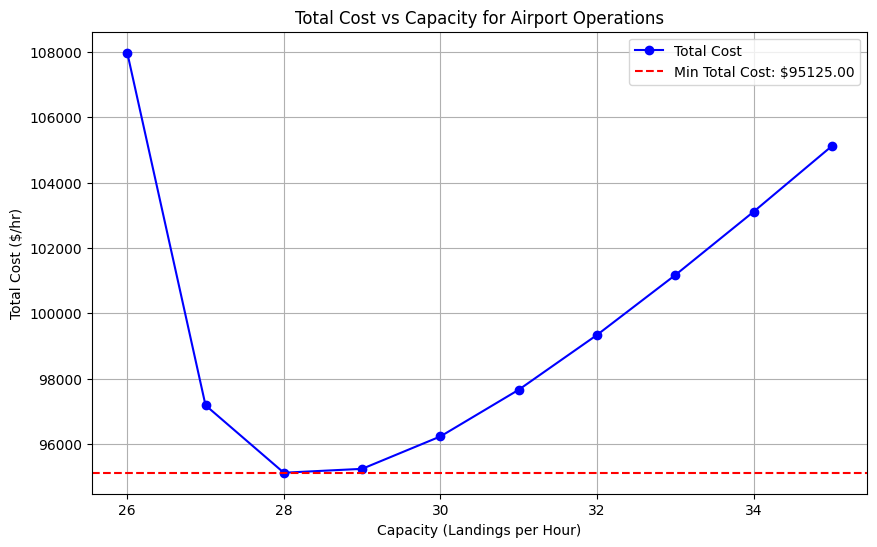

In [5]:
# Plotting the total cost
plt.figure(figsize=(10, 6))
plt.plot(capacities, total_costs, marker='o', linestyle='-', color='b', label='Total Cost')

# Draw a horizontal line at the minimum total cost
plt.axhline(y=min_total_cost, color='r', linestyle='--', label=f'Min Total Cost: ${min_total_cost:.2f}')

# Titles and labels
plt.title('Total Cost vs Capacity for Airport Operations')
plt.xlabel('Capacity (Landings per Hour)')
plt.ylabel('Total Cost ($/hr)')
plt.grid(True)
plt.legend()
plt.show()